# Image Feature Detection

Modified from https://www.geeksforgeeks.org/feature-detection-and-matching-with-opencv-python/

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
im = cv2.imread(os.path.relpath('../../Data/ROC.png'))
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

## Haris Corners
Haris corner detection is a method in which we can detect the corners of the image by sliding a slider box all over the image by finding the corners and it will apply a threshold and the corners will be marked in the image. This algorithm is mainly used to detect the corners of the image.

Syntax
* cv2.cornerHarris(image, dest, blockSize, kSize, freeParameter, borderType)

Parameters:  
* Image – The source image to detect the features
* Dest – Variable to store the output image
* Block size – Neighborhood size
* Ksize – Aperture parameter
* Border type: The pixel revealing type.

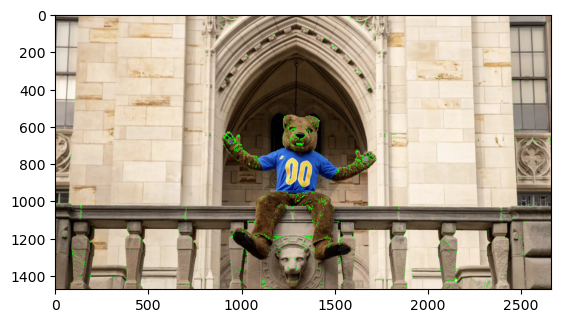

In [3]:
im_harris = im.copy()

gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 
gray_image = np.float32(gray_image) 

# Applying the function 
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)  
# dilate to mark the corners 
dst = cv2.dilate(dst, None) 
im_harris[dst > 0.01 * dst.max()] = [0, 255, 0] 
 
plt.imshow(im_harris) 


## Shi-Tomasi corners

Shi and Tomasi came up with a different corner detection algorithm which is mostly similar to the Haris corner detection algorithm in which the only difference will be the kernel value in which we can find only the n strongest corners of the image. This can greatly help while we need only the limited and very important features of the image.

Syntax: 
* cv2.goodFeaturesToTrack(image, maxc, Quality, maxD)

Parameters:
* image – The source image we need to extract the features.
* maxc – Maximum number of corners we want [Negative values gives all the corners]
* Quality – Quality level parameter (preferred value=0.01)
* maxD – Maximum distance (preferred value=10)

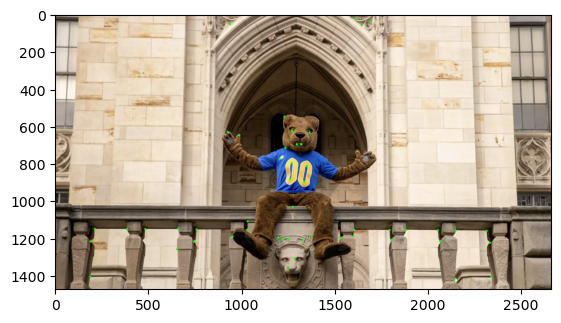

In [4]:
im_STC = im.copy()
gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 
gray_image = np.float32(gray_image) 

corners = cv2.goodFeaturesToTrack( 
    gray_image, maxCorners=50, qualityLevel=0.02, minDistance=20) 
corners = np.float32(corners) 
  
for item in corners: 
    x, y = item[0] 
    x = int(x) 
    y = int(y) 
    cv2.circle(im_STC, (x, y), 6, (0, 255, 0), -1)

plt.imshow(im_STC) 

## SIFT (Scale-Invariant Feature Transform)

While Haris and shi-Tomasi are the algorithms to detect the corners of the image. SIFT is one of the important algorithms that detect objects irrelevant to the scale and rotation of the image and the reference. This helps a lot while we are comparing the real-world objects to an image though it is independent of the angle and scale of the image. This method will return the key points of the images which we need to mark in the image.

Syntax
* sift = cv2.xfeatures2d.SIFT_create()
* kp, des = sift.detectAndCompute(gray_img, None)

[ WARN:0@1.944] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/opencv_contrib-4.6.0/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


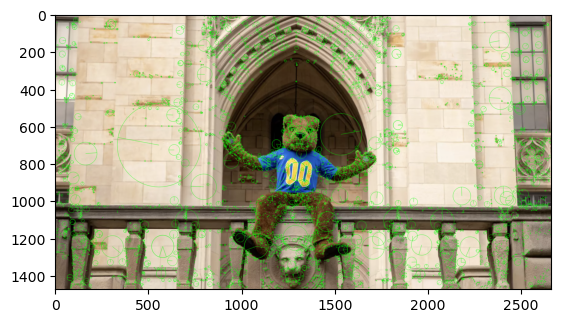

In [5]:
im_SIFT=im.copy()

gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 

sift = cv2.xfeatures2d.SIFT_create() 
kp, des = sift.detectAndCompute(gray_image, None) 

 
# Applying the function 
im_SIFT = cv2.drawKeypoints(im_SIFT, kp, None, color=( 
    0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 


plt.imshow(im_SIFT) 

## FAST algorithm for corner detection

SURF is fast when compared to SIFT but not as fast to use with real-time devices like mobile phones and surveillance cameras. So FAST algorithm was introduced with a very fast computing time. However FAST gives us only the key points and we may need to compute descriptors with other algorithms like SIFT and SURF. With a Fast algorithm, we can detect corners and also blobs.

Syntax:
* fast = cv2.FastFeatureDetector_create()
* fast.setNonmaxSuppression(False)
* kp = fast.detect(gray_img, None)

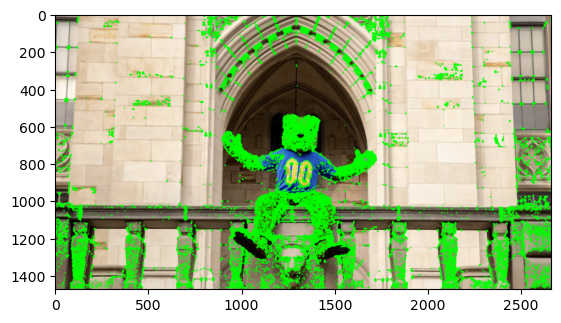

In [6]:
im_FAST=im.copy()

gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 

# Applying the function 
fast = cv2.FastFeatureDetector_create() 
fast.setNonmaxSuppression(False) 
  
  
# Drawing the keypoints 
kp = fast.detect(gray_image, None) 
im_FAST = cv2.drawKeypoints(im_FAST, kp, None, color=(0, 255, 0)) 

plt.imshow(im_FAST)

## ORB Features

ORB is a very effective way of detecting the features of the image when compared to SIFT and SURF. ORB is programmed to find fewer features in the image when compared to the SIFT and SURF algorithm because it detects the very important features in less time than them yet this algorithm is considered as a very effective algorithm when compared to other detecting algorithms.

Syntax:
* orb = cv2.ORB_create(nfeatures=2000)
* kp, des = orb.detectAndCompute(gray_img, None)

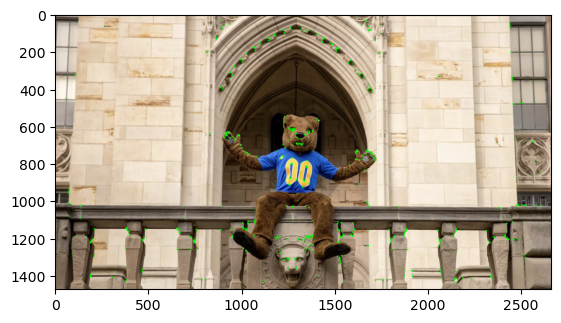

In [7]:
im_ORB=im.copy()

gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 

# Applying the function 
orb = cv2.ORB_create(nfeatures=2000) 
kp, des = orb.detectAndCompute(gray_image, None) 
  
# Drawing the keypoints 
im_ORB = cv2.drawKeypoints(im_ORB, kp, None, color=(0, 255, 0), flags=0) 

plt.imshow(im_ORB)